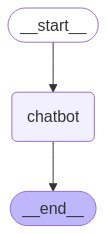

User: What do you know about LangGraph?


TypeError: _init_chat_model_helper() missing 1 required positional argument: 'model'

In [1]:
from langgraph.checkpoint.memory import MemorySaver

from langgraph.graph import StateGraph, START, END

from Models.State import State
from Nodes.chatbot import chatbot
memory = MemorySaver()

graph_builder = StateGraph(State)


#tool_node = BasicToolNode(tools=[tool])

#graph_builder.add_node("tools", tool_node)
graph_builder.add_node("chatbot", chatbot)

graph_builder.add_edge(START, "chatbot")

graph_builder.add_edge("chatbot", END)

graph = graph_builder.compile()


from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

def stream_graph_updates(user_input: str):
    for event in graph.stream({"messages": [{"role": "user", "content": user_input}]}):
        for value in event.values():
            print("Assistant:", value["messages"][-1].content)


while True:
    try:
        user_input = input("User: ")
        if user_input.lower() in ["quit", "exit", "q"]:
            print("Goodbye!")
            break
        stream_graph_updates(user_input)
    except:
        # fallback if input() is not available
        user_input = "What do you know about LangGraph?"
        print("User: " + user_input)
        stream_graph_updates(user_input)
        break